In [1]:
from keras.applications.mobilenet_v2 import MobileNetV2 
from keras.applications.mobilenet import MobileNet
from keras.applications.densenet import DenseNet169
from keras.applications.resnet50 import ResNet50
from keras.applications.nasnet import NASNetMobile, NASNetLarge
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam, SGD, Adagrad, Adadelta
from keras import backend as K
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import random
import pickle
import cv2
import os
import math

%matplotlib inline

Using TensorFlow backend.


In [2]:
# DATASET_PATH = r"G:\landmarks_of_melbourne_sml"
DATASET_PATH = r"E:\dataset15"
TESTSET_PATH = r"G:\landmarks_of_melbourne_sml_test\test\test"

# DATASET_PATH = r"E:\landmarks_of_melbourne_sml"
# TESTSET_PATH = r"E:\landmarks_of_melbourne_sml\test"


In [5]:
# initialize the number of epochs to train for, initial learning rate, batch size, and image dimensions
EPOCHS = 15
INIT_LR = 0.001
BS = 8
LABEL_NUM = 15

# image dimension may need to change according to the model spec

# IMAGE_DIMS =  (224, 224, 3)
IMAGE_DIMS =  (299, 299, 3)

In [6]:
# initialize the data and labels
data = []
labels = []

In [7]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(DATASET_PATH)))
random.seed(881278)
random.shuffle(imagePaths)

In [8]:
# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    assert os.path.isfile(imagePath)
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [9]:
# construct the image generator for data augmentation
# aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1, height_shift_range=0.1, 
#                          shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
aug = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)

In [10]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("data matrix: {:.2f}MB".format(data.nbytes / (1024 * 1000.0)))

# binarize the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

# partition the data into training and testing splits using 85% of the data for training and the remaining 15% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.15 , random_state=881278, stratify=labels)

MemoryError: 

In [9]:
def train():
   
    # create a custom input layer that accepts images of shape IMAGE_DIMS
    input_tensor = Input(shape=IMAGE_DIMS)
    
    # grab the Keras built-in model for transfer learning
    base_model = MobileNetV2(
            include_top=False,
            weights='imagenet',
            input_tensor=input_tensor,
            input_shape=IMAGE_DIMS,
            pooling='avg')
    
    # original model is trained on different dataset with different number of classes
    # so we need to append our own output layer
    output_tensor = Dense(LABEL_NUM, activation='softmax')(base_model.output)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    model.compile(Adam(lr=1e-4), loss="categorical_crossentropy", metrics=['accuracy', 'top_k_categorical_accuracy'])
    
    h = model.fit_generator(
            aug.flow(trainX, trainY, batch_size=BS),
            validation_data=(testX, testY),
            steps_per_epoch=math.ceil(len(trainX)/BS),
            epochs=EPOCHS, verbose=1)

    return h, model

history, model = train()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
610/610 [==============================] - 61s 99ms/step - loss: 0.4868 - acc: 0.8682 - top_k_categorical_accuracy: 0.9654 - val_loss: 0.1281 - val_acc: 0.9641 - val_top_k_categorical_accuracy: 0.9977
Epoch 2/20
610/610 [==============================] - 48s 79ms/step - loss: 0.1247 - acc: 0.9670 - top_k_categorical_accuracy: 0.9971 - val_loss: 0.1304 - val_acc: 0.9652 - val_top_k_categorical_accuracy: 0.9919
Epoch 3/20
610/610 [==============================] - 47s 77ms/step - loss: 0.0916 - acc: 0.9736 - top_k_categorical_accuracy: 0.9982 - val_loss: 0.0906 - val_acc: 0.9757 - val_top_k_categorical_accuracy: 0.9954
Epoch 4/20
610/610 [==============================] - 47s 77ms/step - loss: 0.0611 - acc: 0.9805 - top_k_categorical_accuracy: 0.9992 - val_loss: 0.1622 - val_acc: 0.9594 - val_top_k_categorical_accuracy: 0.9942
Epoch 5/20
610/610 [============

In [9]:
def train():
   
    # create a custom input layer that accepts images of shape IMAGE_DIMS
    input_tensor = Input(shape=IMAGE_DIMS)
    
    # grab the Keras built-in model for transfer learning
    base_model = Xception(
            include_top=False,
            weights='imagenet',
            input_tensor=input_tensor,
            input_shape=IMAGE_DIMS,
            pooling='avg')
    
    # original model is trained on different dataset with different number of classes
    # so we need to append our own output layer
    output_tensor = Dense(LABEL_NUM, activation='softmax')(base_model.output)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    model.compile(Adam(lr=1e-4), loss="categorical_crossentropy", metrics=['accuracy', 'top_k_categorical_accuracy'])
    
    h = model.fit_generator(
            aug.flow(trainX, trainY, batch_size=BS),
            validation_data=(testX, testY),
            steps_per_epoch=len(trainX) // BS,
            epochs=EPOCHS, verbose=1)

    return h, model

history, model = train()

Instructions for updating:
Colocations handled automatically by placer.


NameError: name 'LABEL_NUM' is not defined

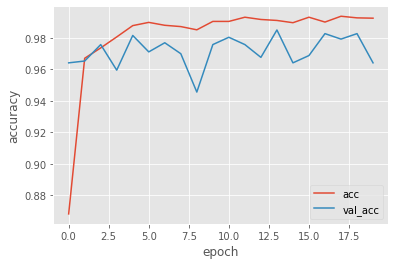

In [10]:
# Plot training & validation accuracy values
plt.style.use("ggplot")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

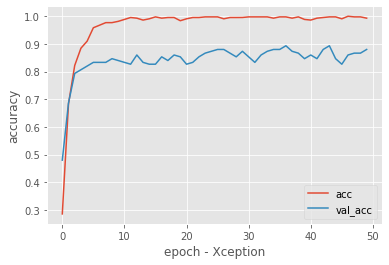

In [11]:
# Plot training & validation accuracy values
plt.style.use("ggplot")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('')
plt.ylabel('accuracy')
plt.xlabel('epoch - Xception')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

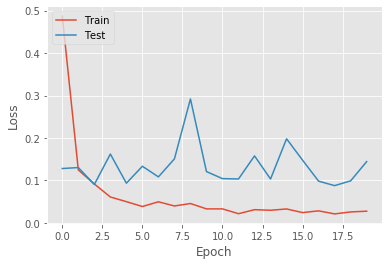

In [11]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
# save the model to disk
model.save("E:\models\MobileNetV2-dataset15-224")

In [13]:
# save the label binarizer to disk
f = open(r"E:\models\lb-dataset15", "wb")
f.write(pickle.dumps(lb))
f.close()

# Classify

In [18]:
# load the trained convolutional neural network and the label binarizer
# model = load_model(args["model"])
lb = pickle.loads(open(r"E:\models\label_binarizer-dataset15", "rb").read())

['G:\\landmarks_of_melbourne_sml_test\\test\\test\\13732Large.jpg', 'G:\\landmarks_of_melbourne_sml_test\\test\\test\\28a00521a646bfc70a1d6b650516284d_2048X1152.jpeg', 'G:\\landmarks_of_melbourne_sml_test\\test\\test\\Chinatown-at-night-1-cropped-Medium.jpg', 'G:\\landmarks_of_melbourne_sml_test\\test\\test\\Queen_Victoria_Market,_Melbourne,_2017-10-29_01.jpg', 'G:\\landmarks_of_melbourne_sml_test\\test\\test\\eureka-skydeck.jpg', 'G:\\landmarks_of_melbourne_sml_test\\test\\test\\flinders-st-station.jpg', 'G:\\landmarks_of_melbourne_sml_test\\test\\test\\luna-park.jpg', 'G:\\landmarks_of_melbourne_sml_test\\test\\test\\melbourne-5-050.jpg', 'G:\\landmarks_of_melbourne_sml_test\\test\\test\\st-pauls-cathedral_mel_r_132569_1600x900.jpg']


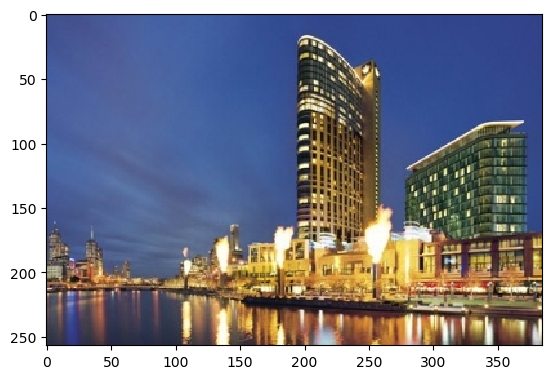

Eureka Tower


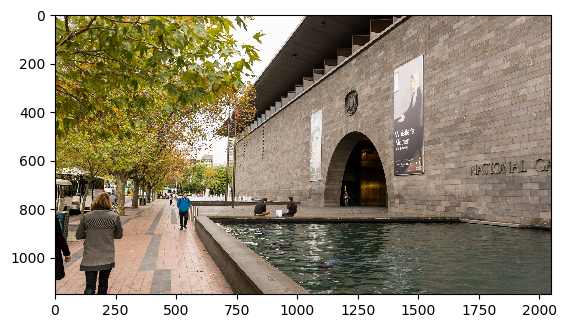

National Gallery of Victoria


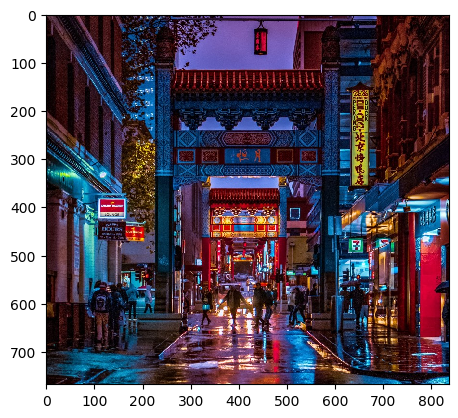

Chinatown


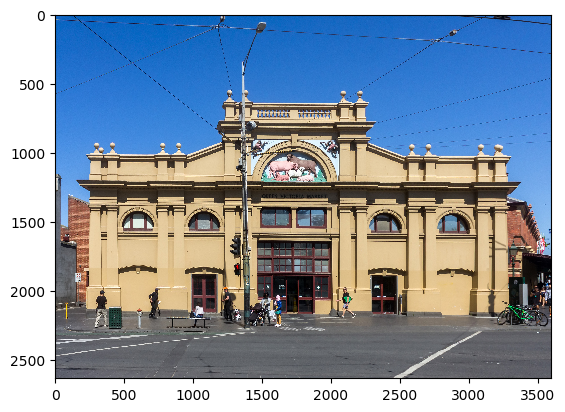

Immigration Museum


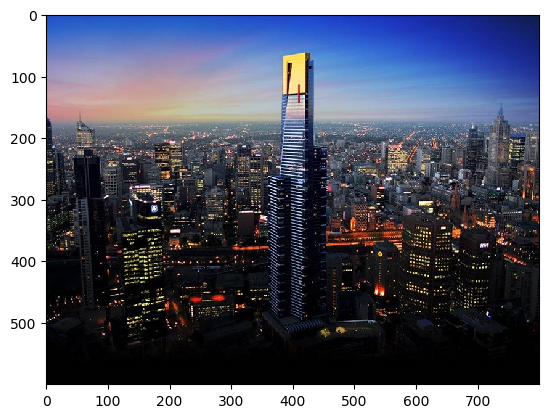

Eureka Tower


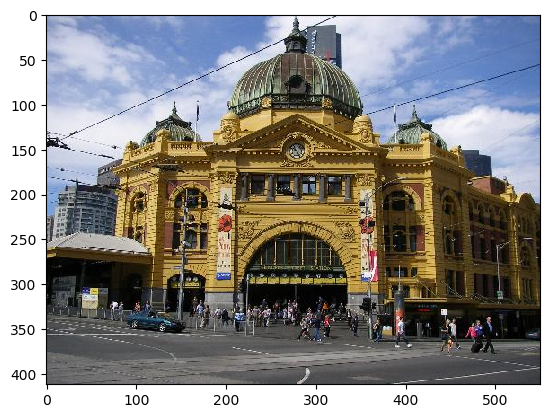

Flinders Street Station


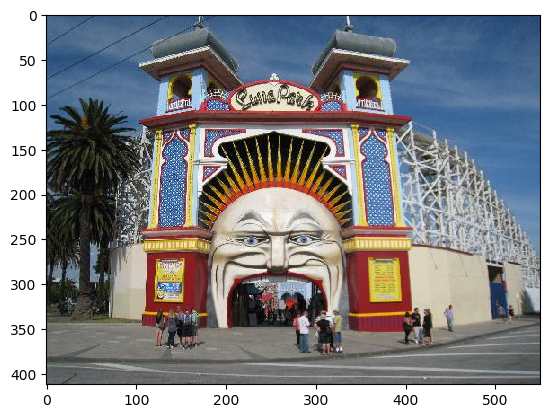

Hosier Lane


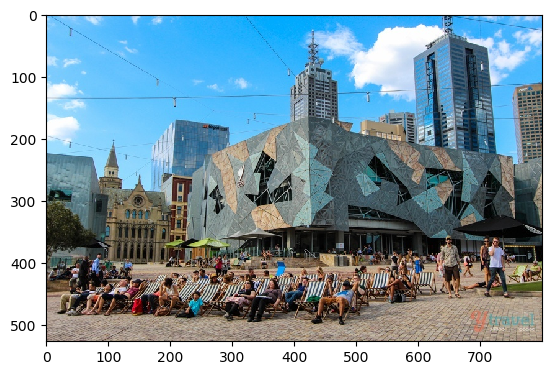

Federation Square


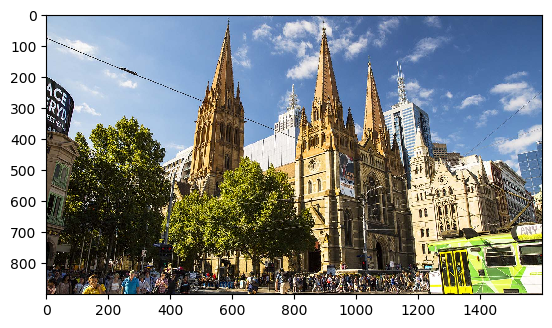

St Paul's Cathedral


In [19]:
imagePaths = sorted(list(paths.list_images(TESTSET_PATH)))
print(imagePaths)
plt.style.use("default")
for x in imagePaths:
    # load the image
    image = cv2.imread(x)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    output = image.copy()

    # pre-process the image for classification
    # image = cv2.resize(image, (96, 96))
    image = cv2.resize(image, (224, 224))

    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    # classify the input image
    proba = model.predict(image)[0]
    idx = np.argmax(proba)
    label = lb.classes_[idx]
    print(label)